# 04 - Distribuição Normal e Teorema Central do Limite

Nessa aula, iremos tratar dos seguintes conteúdos:
- Distribuição Normal
- Teorema Central do Limite

<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>

## 

## Distribuição Normal

A distribuição normal é uma das distribuições mais conhecidas da estatística/probabilidade! Ela é representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (bell shape).  

A curva de distribuição normal representa o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

<br><br>

### Definição Matemática

A Variável aleatória contínua $X$ que tome todos os valores na reta real $-\infty < X < \infty$ segue uma distribuição normal (ou Gaussiana) se sua função de densidade de probabilidade é dada por:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}} $$

Onde respectivamente temos como __valor esperado__ e __variância__ da distribuição normal:

- __Valor esperado:__ $E[X] = \mu$

- __Variância:__ $V[X] = \sigma^2$


<br>

Usualmente aplicamos a notação X ~ N($\mu$,$\sigma^2$) para representar uma variável aleatória **com distribuição normal** de valor esperado/média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>


Em uma distribuição normal a média, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">


Vamos ver algumas formas de gerarmos valores de acordo com uma distribuição Normal:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

## 

## Normalização ou Z-Score
<br>

Imagine ter que calcular a probabilidade de uma distribuição normal de um determinado evento, utilizando a função de densidade de probabilidade. Seria bastante trabalho e nem um pouco usual! 

Para isso então que existe uma relação conhecida como normalização ou __Z-Score__, onde este parâmetro nada mais é que __o número de desvios padrões que a observação está com relação à média__:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$


<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>
<br>

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers. Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

<br>

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**



onde o objetivo é convertermos os dados para uma distribuição normal na forma X ~ N($\mu$, $\sigma^2$) 

**Exemplo**: 

Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

Obs.: Lembrando que para calcular essa probabilidade temos que fazer da seguinte forma:

$$ P(X > 13) = 1 - P( X \leq 13) $$

**Exemplo:** O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam:

a) entre 60 e 77,5 Kg.

$$
P(60 \leq X \leq 77,5) = P\left(\frac{60-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{77,5-\mu}{\sigma}\right)=P\left(\frac{60-\mu}{\sigma} \leq Z \leq \frac{77,5-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{77,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{60-\mu}{\sigma}\right)
$$ 


Podemos também resolver este item simulando os resultados:

b) mais do que 92,5 Kg. 
$$
P(X \geq 92,5) = P\left( \frac{X-\mu}{\sigma}\geq \frac{92,5-\mu}{\sigma}\right) = P\left( Z \geq \frac{92,5-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{92,5-\mu}{\sigma}\right)
$$

Simulando:

Uma forma mais tradicional também para calcular a probabilidade a partir de uma distribuição normal seria justamente utilizar de valores tabelados para o __Z-Score__:

<img src = "https://media.cheggcdn.com/media/70e/70ea2b20-f693-43d1-aa34-33289a97d606/phpqH8k6j" width = 800>

## 

## Teorema Central do Limite

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, como:


Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e desvio padrão $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande ($n > 30$), de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.<br>.

**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

Valor teórico a partir do Z-Score:

Vamos sortear várias amostras de tamanho n = 40 e verificar qual a probabilidade da média dessa amostra ser maior do que 5.

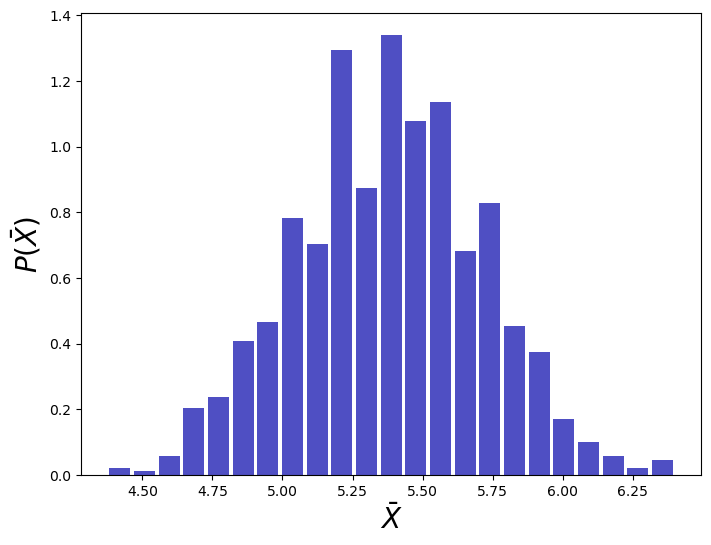

Media das amostras:  5.378175000000001
Media da população:  5.4


A probabilidade de ser maior do que 5:

Probabilidade > 5:  0.859
Valor teórico    :  0.885046886863795


1.030322336279156

## 

## Exercícios

**1)** Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

__2)__ O tempo para desenvolver um servidor web em uma empresa é descrito por uma variável aleatória X, medida em dias, com distribuição normal de média $\mu$ = 45 e variância $\sigma^2$ = 400. Calcule a probabilidade de que um novo servidor web será finalizado entre 30 e 40 dias.

__3)__ Uma população é descrita pela seguinte distribuição de probabilidades:
    
- 𝑃(𝑋 = 2) = 0,2;
- 𝑃(𝑋 = 4) = 0,4;
- 𝑃(𝑋 = 6) = 0,4

Uma amostra com 50 observações é sorteada. Calcule a probabilidade de que a média dessa amostra seja maior do que 4.5

__4)__ Em uma empresa de vendas planos de internet, a duração de conversas telefônicas (em minutos), segue o modelo de uma distribuição exponencial com parâmetro $\lambda = \frac{1}{5}$. Observando-se uma amostra aleatória de 50 dessas chamadas, qual será a probabilidade de que tais amostras em média não ultrapassem 6 minutos?